# Pandas Homework

 #  A Whale off the Port(folio)

   ## In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [2]:
# Data Cleaning

## In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

# Reading whale returns

whale_returns_csv = Path("whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Reading algorithmic returns

algo_returns_csv = Path('algo_returns.csv')
algo_returns_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
# Reading S&P 500 Closing Prices

sp500_history_csv = Path('sp500_history.csv')
sp500_history_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types

sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float64")

In [11]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns

sp500_returns = sp500_history_df.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
# Drop nulls

sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename Column

sp500_returns.columns = ['S&P 500']
sp500_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [16]:
# Combine Whale, Algorithmic, and S&P 500 Returns

# Concatenate all DataFrames into a single DataFrame

combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns], axis = 'columns', join='inner')
combined_df.columns = ['Soros Fund', 'Paulson Co', 'Tiger Global', 'Berkshire Hathaway', 'Algo 1', 'Algo 2', 'S&P 500']
combined_df.head()

,Soros Fund,Paulson Co,Tiger Global,Berkshire Hathaway,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Portfolio Analysis

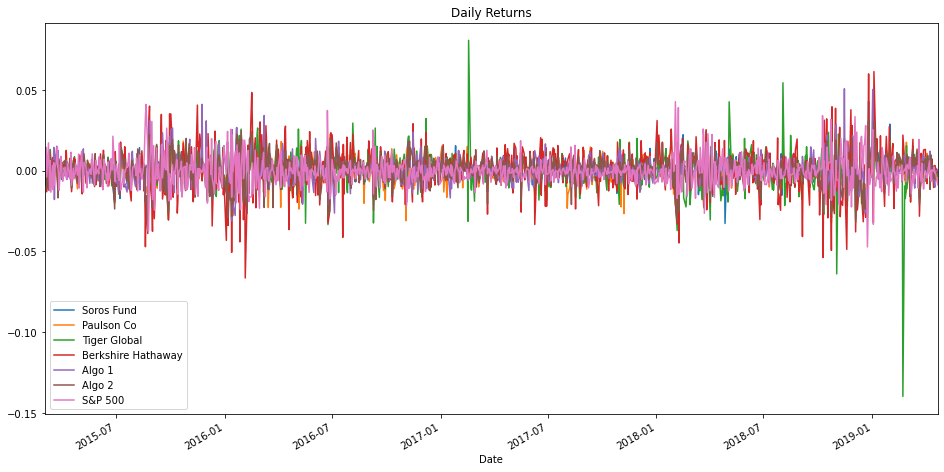

In [17]:
# Plot daily returns

combined_df.plot(figsize = (16,8), title = 'Daily Returns')

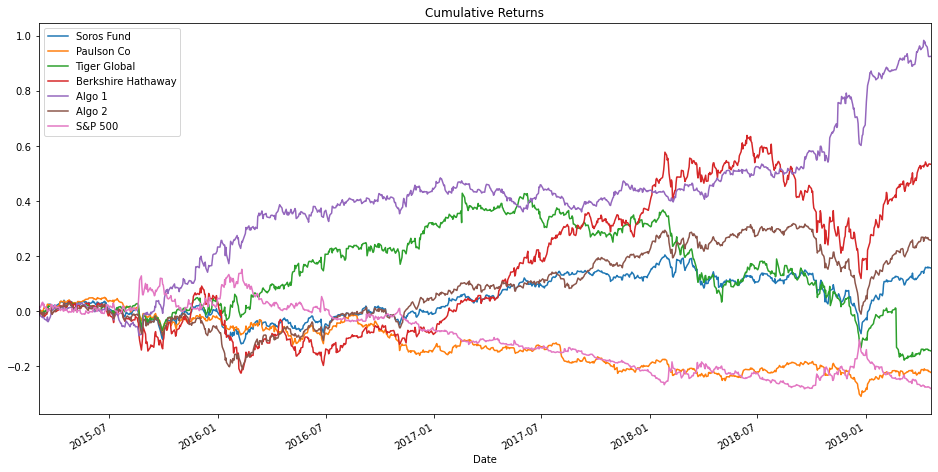

In [18]:
# Plot cumulative returns

cumulative_returns = (1 + combined_df).cumprod() -1
cumulative_returns.plot(figsize = (16,8), title = "Cumulative Returns")

# Risk

## Determine the _risk_ of each portfolio:

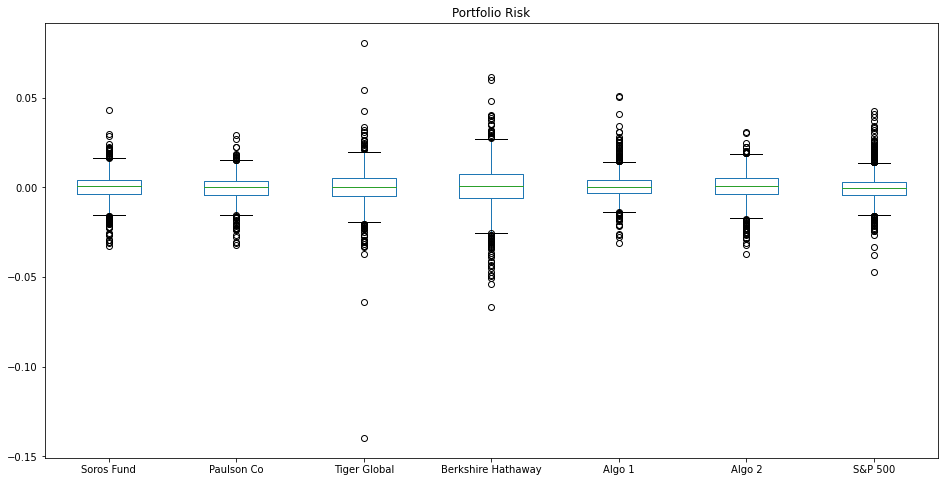

In [19]:
# Box plot to visually show risk

combined_df.plot.box(figsize = (16,8), title = 'Portfolio Risk')

### Daily Standard Deviations

In [20]:
# Calculate the standard deviation for each portfolio. 

standard_dev = combined_df.std()
standard_dev = standard_dev.sort_values(ascending = False)
standard_dev

Berkshire Hathaway    0.012919
Tiger Global          0.010897
S&P 500               0.008587
Algo 2                0.008341
Soros Fund            0.007896
Algo 1                0.007623
Paulson Co            0.007026
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P 500

riskier = standard_dev[standard_dev>standard_dev['S&P 500']]
print(riskier)

Berkshire Hathaway    0.012919
Tiger Global          0.010897
dtype: float64


In [22]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = standard_dev * np.sqrt(252)
annualized_std

Berkshire Hathaway    0.205079
Tiger Global          0.172989
S&P 500               0.136313
Algo 2                0.132413
Soros Fund            0.125348
Algo 1                0.121006
Paulson Co            0.111527
dtype: float64

## Rolling Statistics

In [23]:
# Calculate and plot the rolling standard deviation for 
# the S&P 500 and whale portfolios using a 21 trading day window

sp500_rolling_std = combined_df['S&P 500'].rolling(window=21).std()
SOROS_rolling_std = combined_df['Soros Fund'].rolling(window=21).std()
Berkshire_rolling_std = combined_df['Berkshire Hathaway'].rolling(window=21).std()
Tiger_rolling_std = combined_df['Tiger Global'].rolling(window=21).std()
Algo2_rolling_std = combined_df['Algo 2'].rolling(window=21).std()
Algo1_rolling_std = combined_df['Algo 1'].rolling(window=21).std()
Paulson_rolling_std = combined_df['Paulson Co'].rolling(window=21).std()

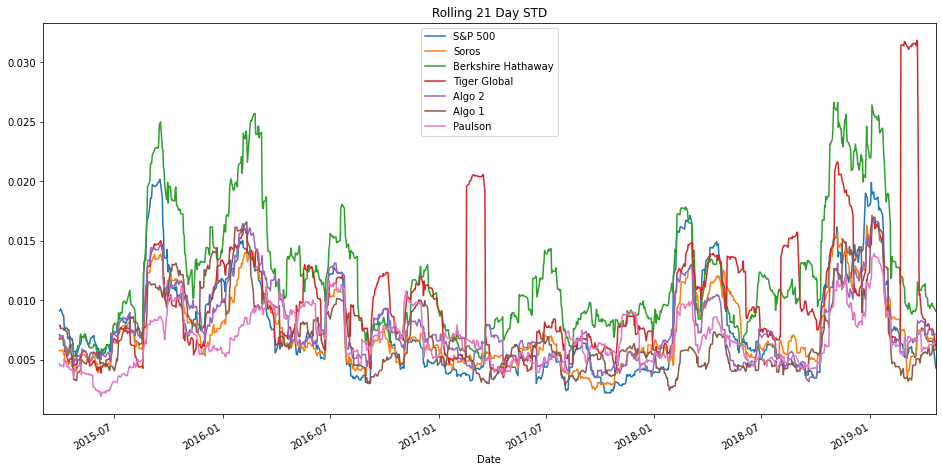

In [24]:
bx = sp500_rolling_std.plot(figsize = (16,8), title = 'Rolling 21 Day STD')

SOROS_rolling_std.plot(ax=bx)
Berkshire_rolling_std.plot(ax=bx)
Tiger_rolling_std.plot(ax=bx)
Algo2_rolling_std.plot(ax=bx)
Algo1_rolling_std.plot(ax=bx)
Paulson_rolling_std.plot(ax=bx)

bx.legend(['S&P 500', 'Soros', 'Berkshire Hathaway', 'Tiger Global', 'Algo 2', 'Algo 1', 'Paulson'])

In [25]:
# Construct a correlation table

correlation = combined_df.corr()
correlation

,Soros Fund,Paulson Co,Tiger Global,Berkshire Hathaway,Algo 1,Algo 2,S&P 500
Soros Fund,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
Paulson Co,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
Tiger Global,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
Berkshire Hathaway,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


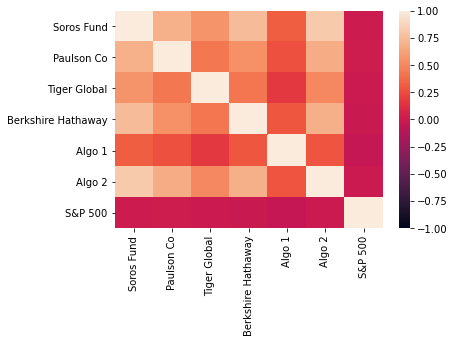

In [26]:
sns.heatmap(correlation, vmin=-1, vmax=1)

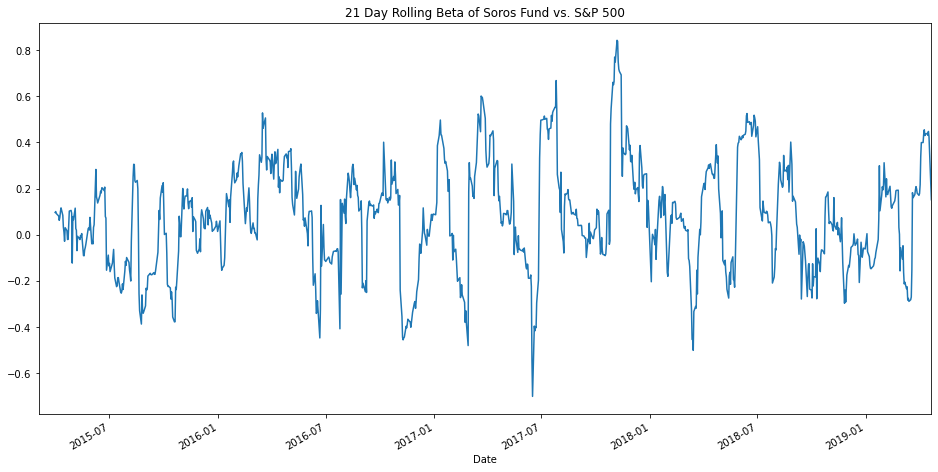

In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

rolling_covariance = combined_df['Soros Fund'].rolling(window=21).cov(combined_df['S&P 500'])
rolling_variance = combined_df['S&P 500'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta

rolling_beta.plot(figsize=(16,8), title = '21 Day Rolling Beta of Soros Fund vs. S&P 500')

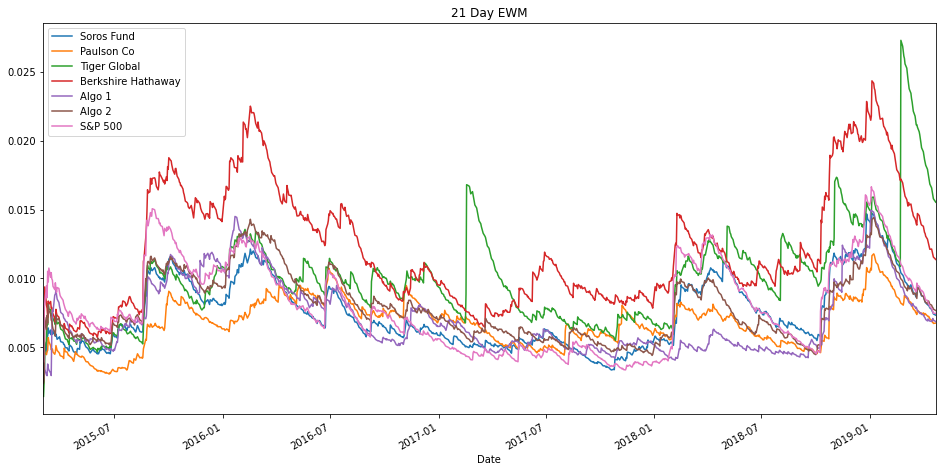

In [28]:
# Calculate a rolling window using the exponentially weighted moving average. 

daily_returns_ewm = combined_df.ewm(halflife=21).std()
daily_returns_ewm.plot(figsize=(16,8), title = '21 Day EWM')

# Sharpe Ratios

In [29]:
# Calculate annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

Soros Fund            0.342894
Paulson Co           -0.491422
Tiger Global         -0.130186
Berkshire Hathaway    0.606743
Algo 1                1.369589
Algo 2                0.484334
S&P 500              -0.518582
dtype: float64

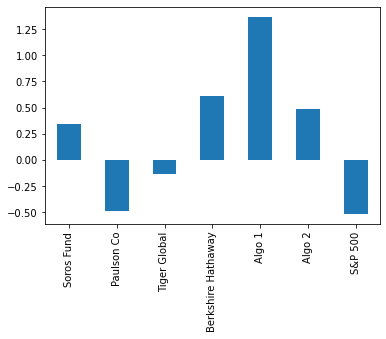

In [30]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar()

## On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:
    
Yes, the algo's do very well compared to the market. Only Berkshire Hathaway has the ability to compete with the algo strategies. 


# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

In [31]:
# Read the first stock

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

nflx_stock_csv = Path('Nflxstock.csv')
nflx_stock_df = pd.read_csv(nflx_stock_csv, index_col='Date', parse_dates=True)
nflx_stock_df.head()

,Close
Date,
2012-10-01,8.01
2012-10-02,8.07
2012-10-03,8.94
2012-10-04,9.52
2012-10-05,9.51


In [32]:
# Read the second stock

tsla_stock_csv = Path('Tslastock.csv')
tsla_stock_df = pd.read_csv(tsla_stock_csv, index_col='Date', parse_dates=True)
tsla_stock_df.head()

,Close
Date,
2012-10-01,29.16
2012-10-02,29.80
2012-10-03,29.30
2012-10-04,29.40
2012-10-05,28.89


In [33]:
# Read the third stock

nvda_stock_csv = Path('Nvdastock.csv')
nvda_stock_df = pd.read_csv(nvda_stock_csv, index_col="Date", parse_dates=True)
nvda_stock_df.head()

,Close
Date,
2012-10-01,13.12
2012-10-02,13.17
2012-10-03,13.04
2012-10-04,13.62
2012-10-05,13.30


In [34]:
# Concatenate all stocks into a single DataFrame

mystocks_combined = pd.concat([nvda_stock_df, tsla_stock_df, nflx_stock_df], axis = 'columns', join='inner')
mystocks_combined.head()

,Close,Close,Close
Date,,,
2012-10-01,13.12,29.16,8.01
2012-10-02,13.17,29.80,8.07
2012-10-03,13.04,29.30,8.94
2012-10-04,13.62,29.40,9.52
2012-10-05,13.30,28.89,9.51


In [ ]:
# Reset the index

## index is already "date"

In [35]:
# Pivot so that each column of prices represents a unique symbol

mystocks_combined.columns = ["NVDA", "TSLA", "NFLX"]
mystocks_combined.head()

,NVDA,TSLA,NFLX
Date,,,
2012-10-01,13.12,29.16,8.01
2012-10-02,13.17,29.80,8.07
2012-10-03,13.04,29.30,8.94
2012-10-04,13.62,29.40,9.52
2012-10-05,13.30,28.89,9.51


In [36]:
# Drop Nulls

mystocks_combined.dropna(inplace=True)
mystocks_combined.isnull().sum()

NVDA    0
TSLA    0
NFLX    0
dtype: int64

# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Calculate weighted portfolio returns

weights = [1/3, 1/3, 1/3]
mystocks_returns = mystocks_combined.pct_change()[1:]
weighted_returns = (weights * mystocks_returns)
portfolio_returns = weighted_returns.sum(axis=1)
cum_weighted_returns = (portfolio_returns + 1).cumprod()
print(cum_weighted_returns)

Date
2012-10-02     1.011083
2012-10-03     1.038435
2012-10-04     1.077470
2012-10-05     1.062424
2012-10-08     1.100242
2012-10-09     1.041592
2012-10-10     1.036034
2012-10-11     1.039552
2012-10-12     1.019420
2012-10-15     1.022132
2012-10-16     1.048088
2012-10-17     1.067849
2012-10-18     1.046583
2012-10-19     1.010175
2012-10-22     1.022857
2012-10-23     1.041480
2012-10-24     0.983810
2012-10-25     0.992911
2012-10-26     1.030996
2012-10-31     1.086125
2012-11-01     1.110730
2012-11-02     1.101113
2012-11-05     1.155778
2012-11-06     1.141897
2012-11-07     1.141589
2012-11-08     1.132356
2012-11-09     1.115576
2012-11-12     1.117874
2012-11-13     1.128209
2012-11-14     1.117246
                ...    
2019-03-11    24.277727
2019-03-12    24.078328
2019-03-13    24.649486
2019-03-14    24.474448
2019-03-15    24.335087
2019-03-18    24.163500
2019-03-19    24.322128
2019-03-20    24.818988
2019-03-21    25.342664
2019-03-22    24.377426
2019-03-25 

# Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Add your "Custom" portfolio to the larger dataframe of fund returns

combined_portfolio = pd.concat([combined_df, mystocks_returns], axis = "columns", join = "inner")
combined_portfolio.head()

,Soros Fund,Paulson Co,Tiger Global,Berkshire Hathaway,Algo 1,Algo 2,S&P 500,NVDA,TSLA,NFLX
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.018584,0.011301,-0.011514
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.011271,0.014432,-0.010469
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.019171,-0.008941,-0.004470
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.013561,-0.033644,-0.029038
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.002661,-0.015473,-0.018653


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_portfolio.dropna(inplace=True)
combined_portfolio.isnull().sum()

Soros Fund            0
Paulson Co            0
Tiger Global          0
Berkshire Hathaway    0
Algo 1                0
Algo 2                0
S&P 500               0
NVDA                  0
TSLA                  0
NFLX                  0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [40]:
# Risk

my_portfolio_std = combined_portfolio.std()
my_portfolio_std = my_portfolio_std.sort_values(ascending = False)
my_portfolio_std

TSLA                  0.027981
NVDA                  0.027703
NFLX                  0.026777
Berkshire Hathaway    0.012919
Tiger Global          0.010897
S&P 500               0.008587
Algo 2                0.008341
Soros Fund            0.007896
Algo 1                0.007623
Paulson Co            0.007026
dtype: float64

In [41]:
# Rolling

sp500_rolling_std = combined_portfolio['S&P 500'].rolling(window=21).std()
SOROS_rolling_std = combined_portfolio['Soros Fund'].rolling(window=21).std()
Berkshire_rolling_std = combined_portfolio['Berkshire Hathaway'].rolling(window=21).std()
Tiger_rolling_std = combined_portfolio['Tiger Global'].rolling(window=21).std()
Algo2_rolling_std = combined_portfolio['Algo 2'].rolling(window=21).std()
Algo1_rolling_std = combined_portfolio['Algo 1'].rolling(window=21).std()
Paulson_rolling_std = combined_portfolio['Paulson Co'].rolling(window=21).std()
tsla_rolling_std = combined_portfolio['TSLA'].rolling(window=21).std()
nvda_rolling_std = combined_portfolio['NVDA'].rolling(window=21).std()
nflx_rolling_std = combined_portfolio['NFLX'].rolling(window=21).std()

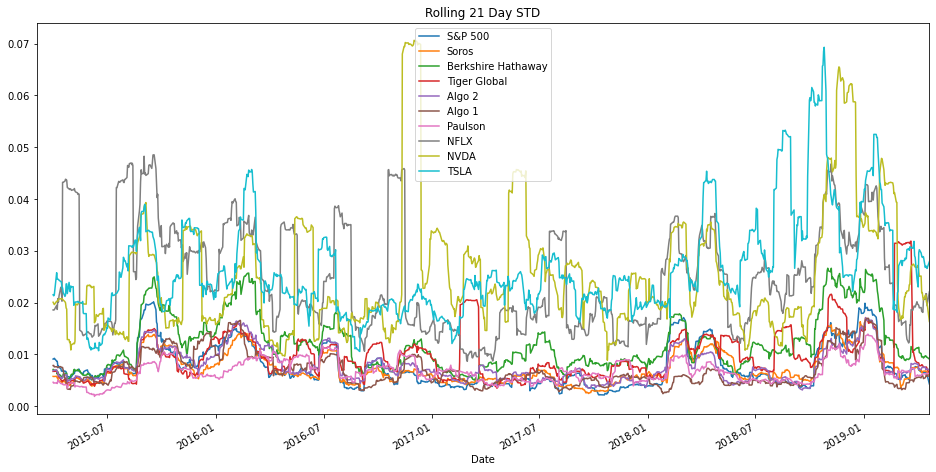

In [42]:
bx = sp500_rolling_std.plot(figsize = (16,8), title = 'Rolling 21 Day STD')

SOROS_rolling_std.plot(ax=bx)
Berkshire_rolling_std.plot(ax=bx)
Tiger_rolling_std.plot(ax=bx)
Algo2_rolling_std.plot(ax=bx)
Algo1_rolling_std.plot(ax=bx)
Paulson_rolling_std.plot(ax=bx)
nflx_rolling_std.plot(ax=bx)
nvda_rolling_std.plot(ax=bx)
tsla_rolling_std.plot(ax=bx)

bx.legend(['S&P 500', 'Soros', 'Berkshire Hathaway', 'Tiger Global', 'Algo 2', 'Algo 1', 'Paulson', 'NFLX', 'NVDA', 'TSLA'])

In [43]:
# Annualized Sharpe Ratios

sharpe_ratios2 = (combined_portfolio.mean() * 252) / (combined_portfolio.std() * np.sqrt(252))
sharpe_ratios2

Soros Fund            0.342894
Paulson Co           -0.491422
Tiger Global         -0.130186
Berkshire Hathaway    0.606743
Algo 1                1.369589
Algo 2                0.484334
S&P 500              -0.518582
NVDA                  1.384015
TSLA                  0.377168
NFLX                  1.180318
dtype: float64

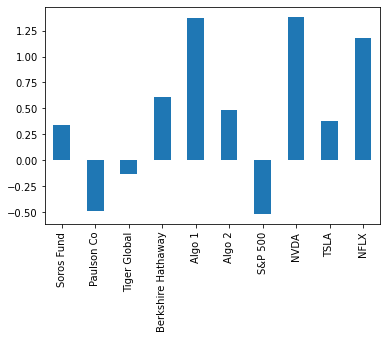

In [44]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios2.plot.bar()

In [45]:
# Create a correlation analysis

combined_portfolio.corr()

,Soros Fund,Paulson Co,Tiger Global,Berkshire Hathaway,Algo 1,Algo 2,S&P 500,NVDA,TSLA,NFLX
Soros Fund,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.471785,0.359205,0.461306
Paulson Co,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.321229,0.262563,0.350842
Tiger Global,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.281293,0.245699,0.273274
Berkshire Hathaway,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.499667,0.393460,0.639682
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.120296,0.135753,0.185243
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.466404,0.347201,0.427749
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,-0.017634,0.049235,-0.006548
NVDA,0.471785,0.321229,0.281293,0.499667,0.120296,0.466404,-0.017634,1.000000,0.260242,0.337407
TSLA,0.359205,0.262563,0.245699,0.393460,0.135753,0.347201,0.049235,0.260242,1.000000,0.306264
NFLX,0.461306,0.350842,0.273274,0.639682,0.185243,0.427749,-0.006548,0.337407,0.306264,1.000000


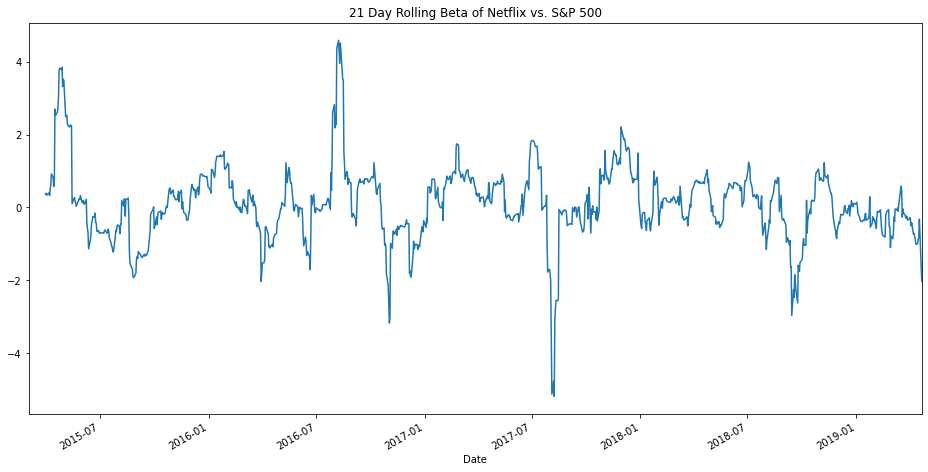

In [46]:
# Beta

rolling_covariance2 = combined_portfolio['NFLX'].rolling(window=21).cov(combined_portfolio['S&P 500'])
rolling_variance2 = combined_portfolio['S&P 500'].rolling(window=21).var()
rolling_beta2 = rolling_covariance2 / rolling_variance2
rolling_beta2

rolling_beta2.plot(figsize=(16,8), title = '21 Day Rolling Beta of Netflix vs. S&P 500')